In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

# here is read data, fillna and one-hot coding
hw4_data = pd.read_csv("HW4_house-prices.csv", sep=",")
count = 0
X = pd.read_csv("HW4_house-prices.csv", sep=",")

for i in hw4_data.columns:

    if (is_numeric_dtype(hw4_data[i]) == False):
        X = X.drop([i], axis=1)
        df = pd.get_dummies(hw4_data[i])
        # print(df)
        X = pd.concat([X, df], axis=1)
    else:
        hw4_data[i] = hw4_data[i].fillna(hw4_data[i].mean(skipna=True))
        if(i != "SalePrice"):
            X[i] = X[i].fillna(
                X[i].mean(skipna=True))

In [29]:
# here is training and find best model
Y = pd.DataFrame(hw4_data['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(
    X.drop(['SalePrice'], axis=1), Y, test_size=0.3, random_state=1)

linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

ridge_reg = linear_model.Ridge().fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)

lasso_reg = linear_model.Lasso().fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)

winner = mean_squared_error(np.asarray(y_test), y_pred)
winner_pred = y_pred
usemodule = 1

r = mean_squared_error(np.asarray(y_test), ridge_pred)
l = mean_squared_error(np.asarray(y_test), lasso_pred)

print("linear MSE:",winner)
print("ridge MSE:",r)
print("lasso MSE:",l)

if winner > r:
    winner = r
    winner_pred = ridge_pred
    usemodule = 2
if winner > l:
    winner = l
    winner_pred = lasso_pred
    usemodule = 3

print("winner MSE is:",winner)



linear MSE: 952553710.7827173
ridge MSE: 876942089.407099
lasso MSE: 868792578.6508838
winner MSE is: 868792578.6508838


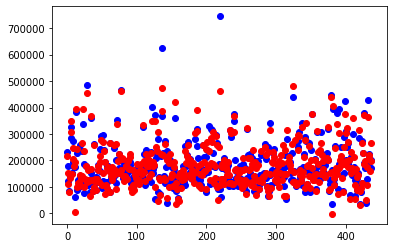

In [30]:
# here is drawing graph of best model

plt.scatter(list(range(len(X_test))), np.asarray(y_test), color='blue')
plt.scatter(list(range(len(X_test))), winner_pred, color='red')
plt.show()


In [31]:
# here is standardlization of best model

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
stand = linear_model.Lasso().fit(scaler.transform(X_train), y_train)
s_pred = stand.predict(scaler.transform(X_test))
s = mean_squared_error(np.asarray(y_test), s_pred)
print("MSE after standarlization:", s)


MSE after standarlization: 915949972.5562291


<AxesSubplot:>

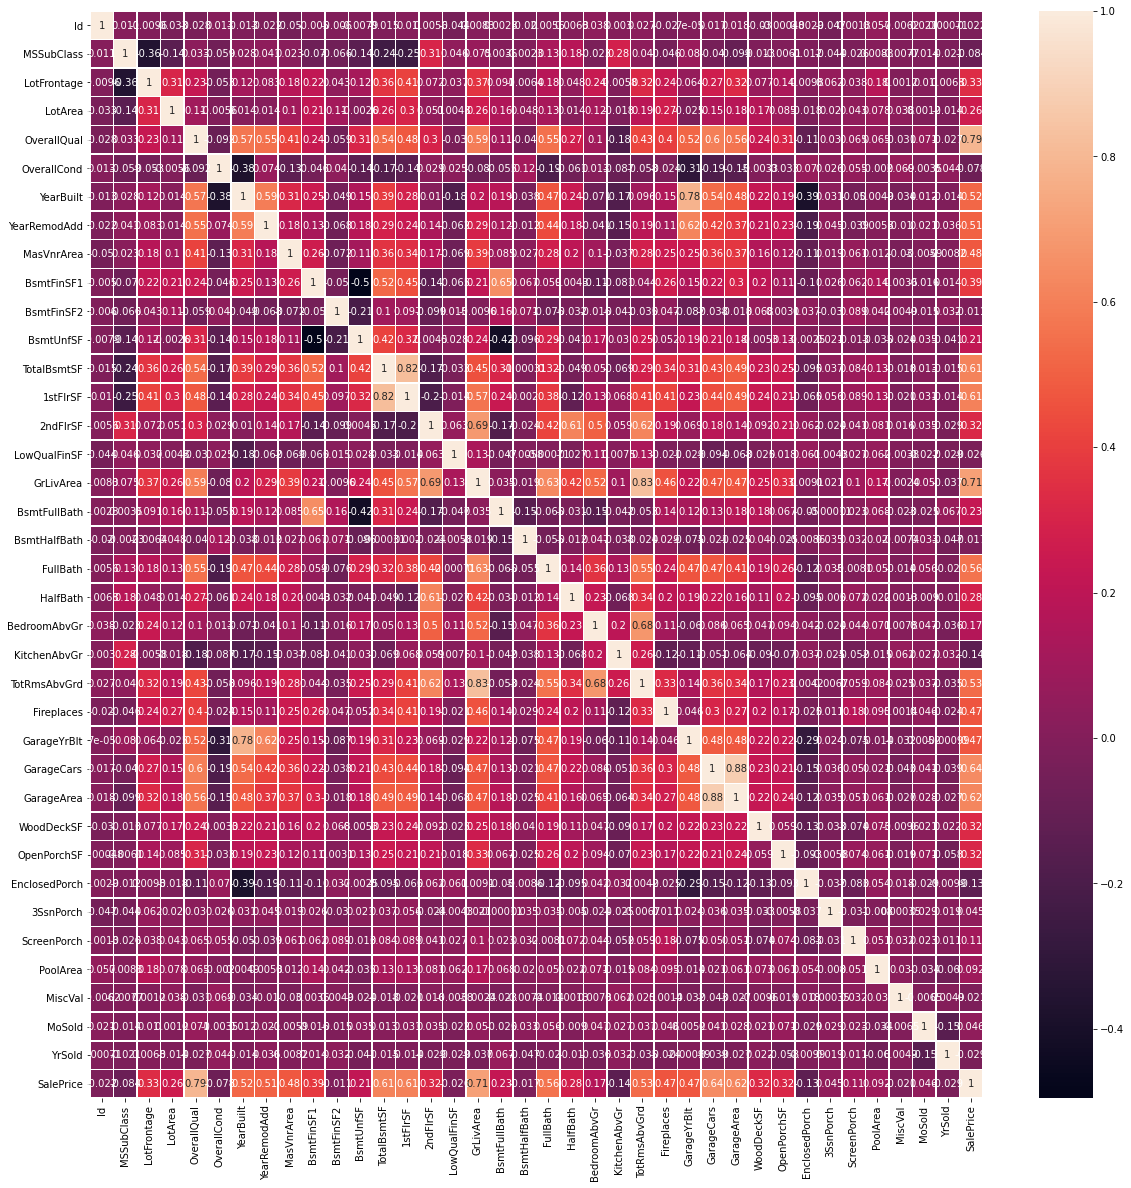

In [32]:
# here is drawing heatmap

fig, ax = plt.subplots(figsize=(20,20))
co_ma = hw4_data.corr()    
sns.heatmap(co_ma, annot=True, linewidths=.5, ax=ax)

In [33]:
# here is training with 4 highest or lowest r

so = abs(co_ma['SalePrice']).sort_values()
high = pd.DataFrame(hw4_data[so.iloc[-5:-1].index])
low = pd.DataFrame(hw4_data[so.iloc[0:4].index])

h_train, h_test, y_tr, y_te = train_test_split(
    high, Y, test_size=0.3, random_state=1)
l_train, l_test, y_tra, y_tes = train_test_split(
    low, Y, test_size=0.3, random_state=1)


high_reg = linear_model.LinearRegression().fit(h_train, y_train)
high_pred = high_reg.predict(h_test)

low_reg = linear_model.LinearRegression().fit(l_train, y_train)
low_pred = low_reg.predict(l_test)

h_s = mean_squared_error(np.asarray(y_test), high_pred)
l_s = mean_squared_error(np.asarray(y_test), low_pred)
print("winner MSE: ", winner, "\n",
      "4 highest r MSE: ", h_s, "\n",
      "4 lowest r MSE: ", l_s, sep='')

winner MSE: 868792578.6508838
4 highest r MSE: 1518838400.9269478
4 lowest r MSE: 7142361929.246698


winner MSE:  868792578.6508838 
 MSE after drop outlier: 570105764.9475015


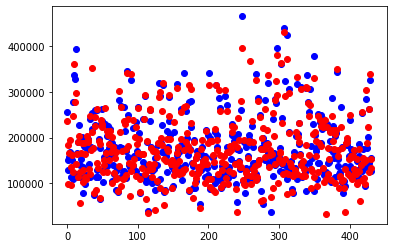

In [34]:
# here is training model without outlier


drop_outlier = X[X.GrLivArea < 3000]
drop_outlier = drop_outlier[drop_outlier.SalePrice < 500000]

drop_outlier_X = drop_outlier.drop(['SalePrice'], axis=1)
drop_outlier_Y = pd.DataFrame(drop_outlier['SalePrice'])

drop_X_train, drop_X_test, drop_y_train, drop_y_test = train_test_split(
    drop_outlier_X, drop_outlier_Y, test_size=0.3, random_state=1)


if(usemodule == 1):
    linear_reg = linear_model.LinearRegression()
    linear_reg.fit(drop_X_train, drop_y_train)
    winner_pred = linear_reg.predict(drop_X_test)
elif(usemodule == 2):
    ridge_reg = linear_model.Ridge().fit(drop_X_train, drop_y_train)
    winner_pred = ridge_reg.predict(drop_X_test)
else:
    lasso_reg = linear_model.Lasso().fit(drop_X_train, drop_y_train)
    winner_pred = lasso_reg.predict(drop_X_test)


drop_MSE = mean_squared_error(np.asarray(drop_y_test), winner_pred)
print("winner MSE: ", winner, "\n",
      "MSE after drop outlier:", drop_MSE)


plt.scatter(list(range(len(drop_X_test))),
            np.asarray(drop_y_test), color='blue')
plt.scatter(list(range(len(drop_X_test))), winner_pred, color='red')
plt.show()